- Your adventuring party has the following martial party members:
    - Uzben Grimblade, a Level 5 Dwarf Ninja.[2]
    - Varina Dourstone, a Level 5 Dwarf Warrior.
    - Willow Brown, a Level 5 Human Ranger.
    - Xerxes III of Calantha, a Level 5 Human Monk.
    - Yalathinel Leafstrider, a Level 5 Elf Fencer.
    - Zelaya Sunwalker, a Level 6 Elf Knight.
- You also have some magical items to distribute among them.  You have seven magical items total, one each of:
    - +1, +2, +3 and +4 Boots of Speed
    - +1, +2 and +3 Gauntlets of Power
- You need to choose who will fight each of the four opposing champions:
    - House Adelon's champion is a Level 6 Human Warrior with +3 Boots of Speed and +1 Gauntlets of Power.
    - House Bauchard's champion is a Level 6 Human Knight with +3 Boots of Speed and +2 Gauntlets of Power.
    - House Cadagal's champion is a Level 7 Elf Ninja with +2 Boots of Speed and +3 Gauntlets of Power.
    - House Deepwrack's champion is a Level 6 Dwarf Monk with +3 Boots of Speed and +2 Gauntlets of Power.
- Your goal is to maximize the number of champions you defeat.
- For each opposing champion, you need to choose and equip one of your party members to fight them.  You cannot send the same party member to fight two champions, nor can you equip the same item to two party members.
- For example, a solution could be:
    - Give Uzben the +4 Boots of Speed and the +3 Gauntlets of Power and send him to fight House Adelon's champion.
    - Give Varina the +3 Boots of Speed and the +2 Gauntlets of Power and send her to fight House Bauchard's champion.
    - Give Willow the +2 Boots of Speed and the +1 Gauntlets of Power and send her to fight House Cadagal's champion.
    - Give Xerxes the +1 Boots of Speed and send him to fight House Deepwrack's champion.
    - Do not send Yalathinel or Zelaya to fight at all.
- To assist in this, you have a dataset with the records of past fights in the Arena.  Each dataset shows the two fighters that took part, what their levels/races/classes/magical items were, and which one won.


In [19]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib auto
classes = ["Warrior", "Knight", "Ninja", "Fencer", "Monk", "Ranger"]
races = [""]
data = pd.read_csv('./gladiator_output.csv')
data

Using matplotlib backend: module://matplotlib_inline.backend_inline


,Red_Gladiator,Red_Level,Red_Race,Red_Class,Red_Boots,Red_Gauntlets,Black_Gladiator,Black_Level,Black_Race,Black_Class,Black_Boots,Black_Gauntlets,Winner
0,Level 1 Elf Warrior with +2 Boots of Speed and...,1,Elf,Warrior,2,1,Level 1 Elf Warrior with +3 Boots of Speed and...,1,Elf,Warrior,3,1,Black
1,Level 2 Elf Monk with +1 Boots of Speed and +3...,2,Elf,Monk,1,3,Level 1 Human Monk with +3 Boots of Speed and ...,1,Human,Monk,3,3,Red
2,Level 3 Elf Warrior with +1 Boots of Speed and...,3,Elf,Warrior,1,1,Level 4 Human Fencer with +2 Boots of Speed an...,4,Human,Fencer,2,2,Black
3,Level 1 Elf Fencer with +1 Gauntlets of Power,1,Elf,Fencer,0,1,Level 2 Human Knight with +3 Boots of Speed an...,2,Human,Knight,3,1,Black
4,Level 1 Elf Fencer with +1 Boots of Speed and ...,1,Elf,Fencer,1,3,Level 3 Human Monk with +1 Gauntlets of Power,3,Human,Monk,0,1,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80092,Level 6 Human Ninja with +2 Boots of Speed and...,6,Human,Ninja,2,2,Level 4 Dwarf Warrior with +2 Boots of Speed a...,4,Dwarf,Warrior,2,2,Black
80093,Level 4 Human Warrior with +2 Boots of Speed a...,4,Human,Warrior,2,2,Level 6 Dwarf Warrior with +3 Boots of Speed a...,6,Dwarf,Warrior,3,1,Black
80094,Level 4 Dwarf Fencer with +3 Gauntlets of Power,4,Dwarf,Fencer,0,3,Level 3 Dwarf Fencer with +2 Boots of Speed an...,3,Dwarf,Fencer,2,2,Black
80095,Level 4 Dwarf Warrior with +2 Boots of Speed a...,4,Dwarf,Warrior,2,2,Level 6 Dwarf Warrior with +3 Boots of Speed a...,6,Dwarf,Warrior,3,1,Black


In [2]:
# How much randomness is there in match results? better gear => more winning or guaranteed?
data.query('Red_Level==Black_Level and Red_Class==Black_Class')

,Red_Gladiator,Red_Level,Red_Race,Red_Class,Red_Boots,Red_Gauntlets,Black_Gladiator,Black_Level,Black_Race,Black_Class,Black_Boots,Black_Gauntlets,Winner
0,Level 1 Elf Warrior with +2 Boots of Speed and...,1,Elf,Warrior,2,1,Level 1 Elf Warrior with +3 Boots of Speed and...,1,Elf,Warrior,3,1,Black
11,Level 1 Elf Knight with +2 Gauntlets of Power,1,Elf,Knight,0,2,Level 1 Elf Knight with +1 Boots of Speed and ...,1,Elf,Knight,1,2,Black
89,Level 2 Dwarf Warrior with +1 Boots of Speed a...,2,Dwarf,Warrior,1,2,Level 2 Dwarf Warrior with +1 Boots of Speed a...,2,Dwarf,Warrior,1,3,Black
96,Level 2 Human Monk with +1 Boots of Speed and ...,2,Human,Monk,1,1,Level 2 Human Monk with +1 Boots of Speed and ...,2,Human,Monk,1,1,Black
144,Level 2 Dwarf Ninja,2,Dwarf,Ninja,0,0,Level 2 Human Ninja with +1 Boots of Speed and...,2,Human,Ninja,1,1,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80024,Level 6 Elf Warrior with +1 Boots of Speed and...,6,Elf,Warrior,1,1,Level 6 Elf Warrior with +1 Boots of Speed and...,6,Elf,Warrior,1,3,Black
80029,Level 2 Elf Warrior with +3 Gauntlets of Power,2,Elf,Warrior,0,3,Level 2 Dwarf Warrior with +2 Boots of Speed a...,2,Dwarf,Warrior,2,1,Red
80033,Level 4 Human Fencer with +1 Boots of Speed an...,4,Human,Fencer,1,3,Level 4 Human Fencer with +2 Boots of Speed an...,4,Human,Fencer,2,3,Black
80056,Level 3 Dwarf Warrior with +1 Boots of Speed a...,3,Dwarf,Warrior,1,1,Level 3 Dwarf Warrior with +3 Boots of Speed,3,Dwarf,Warrior,3,0,Black


<Axes: ylabel='0,1'>

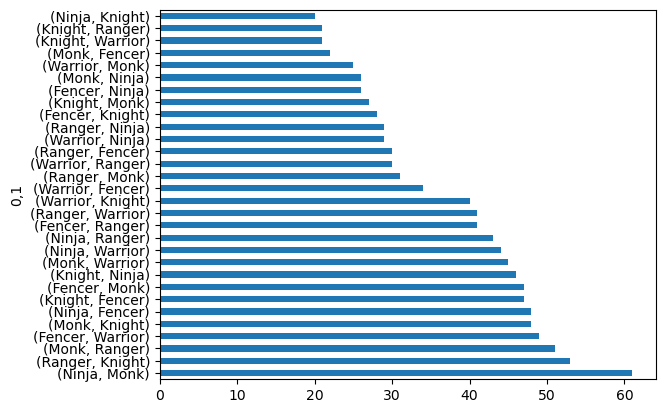

In [46]:
# Class matchups?
vc = data.query("Red_Level==Black_Level and Red_Class!=Black_Class and Red_Boots==Black_Boots and Red_Gauntlets==Black_Gauntlets")\
         .apply(lambda row: [row[row['Winner']+'_Class'], row['Red_Class'] if row['Winner'] == "Black" else row['Black_Class']], axis=1, result_type="expand")\
         .value_counts()
vc.plot(kind="barh")

In [40]:
table_norm = pd.DataFrame(0.0, index=classes, columns=classes)
for x in classes:
    for y in classes:
        if x != y:
            table_norm.loc[x,y] = vc[x][y]/(vc[x][y]+vc[y][x])

In [41]:
# X (row) wins against Y (column) normalized stats
table_norm

,Warrior,Knight,Ninja,Fencer,Monk,Ranger
Warrior,0.000000,0.655738,0.397260,0.409639,0.357143,0.422535
Knight,0.344262,0.000000,0.696970,0.626667,0.360000,0.283784
Ninja,0.602740,0.303030,0.000000,0.648649,0.701149,0.597222
Fencer,0.590361,0.373333,0.351351,0.000000,0.681159,0.577465
Monk,0.642857,0.640000,0.298851,0.318841,0.000000,0.621951
Ranger,0.577465,0.716216,0.402778,0.422535,0.378049,0.000000


<Axes: ylabel='0,1'>

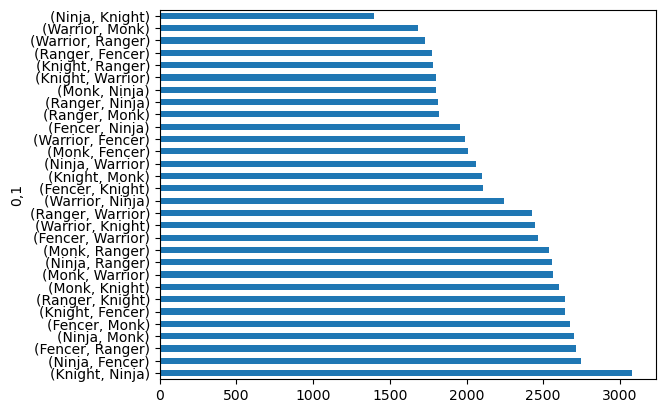

In [47]:
# Class matchups?
vc = data.query("Red_Class!=Black_Class")\
         .apply(lambda row: [row[row['Winner']+'_Class'], row['Red_Class'] if row['Winner'] == "Black" else row['Black_Class']], axis=1, result_type="expand")\
         .value_counts()
vc.plot(kind="barh")

In [48]:
table = pd.DataFrame(0.0, index=classes, columns=classes)
for x in classes:
    for y in classes:
        if x != y:
            table.loc[x,y] = vc[x][y]/(vc[x][y]+vc[y][x])

In [49]:
table

,Warrior,Knight,Ninja,Fencer,Monk,Ranger
Warrior,0.000000,0.576171,0.521003,0.446316,0.396182,0.416747
Knight,0.423829,0.000000,0.687961,0.556445,0.446383,0.402806
Ninja,0.478997,0.312039,0.000000,0.583759,0.600044,0.585544
Fencer,0.553684,0.443555,0.416241,0.000000,0.571093,0.604765
Monk,0.603818,0.553617,0.399956,0.428907,0.000000,0.582264
Ranger,0.583253,0.597194,0.414456,0.395235,0.417736,0.000000
